# **Clasificación 2**

**Paso 1: Ajustar un Random Forest**

Se crea y entrena un modelo de Random Forest con los datos de entrenamiento.

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = 'heart_faliure_limpio.csv'
data = pd.read_csv(file_path)

# Preparar los datos (eliminar la columna 'categoria_edad')
X = data.drop(columns=['DEATH_EVENT', 'age category'])
y = data['DEATH_EVENT']

# Partición del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Ajustar un modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predecir en el conjunto de test
y_pred = rf.predict(X_test)


**Paso 2: Calcular la Matriz de Confusión**

La matriz de confusión se utiliza para visualizar el rendimiento del modelo mostrando las verdaderas positivas, verdaderas negativas, falsas positivas y falsas negativas.

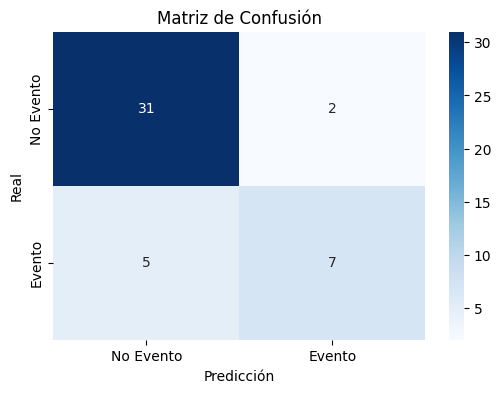

In [5]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Evento', 'Evento'], yticklabels=['No Evento', 'Evento'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


**Paso 3: Calcular el F1-Score y Comparar con el Accuracy**

- El accuracy mide la proporción de predicciones correctas sobre el total de predicciones.
- El F1-Score es una medida más equilibrada que considera tanto la precisión como la sensibilidad del modelo, especialmente útil en datasets desbalanceados.

In [6]:
# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calcular el F1-Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.2f}')



Accuracy: 0.84
F1-Score: 0.67


**Paso 4: Optimizar el Modelo Ajustando Hiperparámetros**

- Se realiza una búsqueda en grid para encontrar los mejores hiperparámetros que optimicen el rendimiento del modelo.
- Se vuelve a calcular la matriz de confusión, el accuracy y el F1-Score para el mejor modelo encontrado.

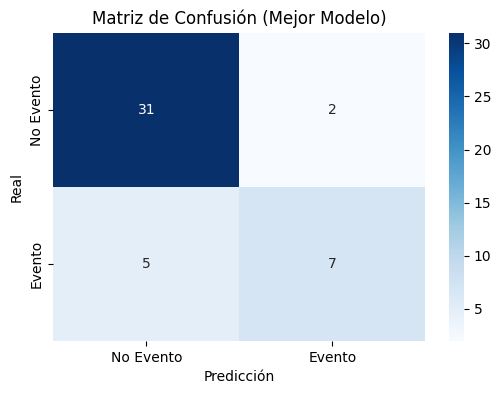

Mejor Accuracy: 0.84
Mejor F1-Score: 0.67
Mejores Parámetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [7]:
# Definir los parámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Realizar la búsqueda en grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)

# Mejor modelo
best_rf = grid_search.best_estimator_

# Predecir en el conjunto de test con el mejor modelo
y_pred_best = best_rf.predict(X_test)

# Calcular la matriz de confusión para el mejor modelo
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['No Evento', 'Evento'], yticklabels=['No Evento', 'Evento'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Mejor Modelo)')
plt.show()

# Calcular el accuracy y el F1-Score para el mejor modelo
best_accuracy = accuracy_score(y_test, y_pred_best)
best_f1 = f1_score(y_test, y_pred_best)
print(f'Mejor Accuracy: {best_accuracy:.2f}')
print(f'Mejor F1-Score: {best_f1:.2f}')
print(f'Mejores Parámetros: {grid_search.best_params_}')


El uso del F1-Score junto con el accuracy proporciona una evaluación más completa del rendimiento del modelo, especialmente en el contexto de un dataset desbalanceado. La optimización de hiperparámetros es crucial para mejorar la precisión del modelo y asegurar que se maximiza su capacidad predictiva.